Mike (Mingsi) Gu <br>
CMSC 25300 <br>
PSET 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import svd

1.

In [182]:
d_jest = loadmat ('jesterdata.mat')
X = d_jest['X']
p_obs = .8
N = X.size
N_obs = int(np.round(p_obs * N))
Omega = np.random.choice(N , N_obs , replace = False )
X_obs = np.zeros( N )
X_obs[ Omega ] = X.reshape( -1)[ Omega ]
X_obs = X_obs.reshape(X.shape )

In [183]:
r = 5
epsilon = 10e-4
X_old = np.zeros(X.shape)
X_est = np.copy(X_obs)
mat_diff = np.linalg.norm(X_est - X_old)
i = 0
while mat_diff > epsilon:
    i += 1
    U, s, VT = svd(X_est)
    Sigma = np.zeros((X.shape[0], X.shape[1]))
    Sigma[:X.shape[0], :X.shape[0]] = np.diag(s)
    Sigma = Sigma[:, :r]
    VT = VT[:r, :]
    Z = U.dot(Sigma.dot(VT))
    X_est = Z.reshape(-1)
    X_est[Omega] = X.reshape(-1)[Omega]
    X_est = X_est.reshape(X.shape )
    mat_diff = np.linalg.norm(X_est - X_old)
    X_old = X_est

The matrix returned from matrix completion has a lower error than the matrix that filled the gaps with zeros. A good choice of r is low enough that it does not overfit the data, but high enough to retain enough information from the data. I used r=5. The higher the p_obs, the less iterations it will take to converge and the higher the accuracy of the final matrix returned. 

In [184]:
obs_error = np.linalg.norm((X_obs - X))
est_error =np.linalg.norm((X_est - X))
print('obs_error', obs_error)
print('est_error', est_error)

obs_error 2018.310846425794
est_error 1555.348687366224


2.

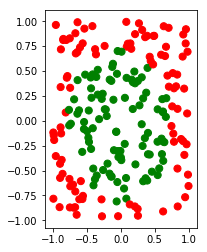

In [147]:
p = 2
n = 200
m = 100 ** 2
X = 2 * np.random.rand(n , p ) - 1
X_test1 , X_test2 = np.meshgrid( np.linspace( -1 , 1 , 100) ,np.linspace( -1 , 1 , 100))
X_test = np.concatenate([ X_test2.reshape ( -1 , 1), X_test1.reshape( -1 , 1)] , -1)
X = np.concatenate([ X , np.ones(( n , 1))] , -1)
X_test = np.concatenate([ X_test , np.ones(( m , 1))] , -1)
y = np.sum(( X[: , 0:2] + .05) ** 2 , 1) < .6
z = np.array([ 'r'] * y.shape [0])
z[ y ] = 'g'
ax = plt.subplot(122)
ax.scatter( X[: , 0] , X[: , 1] ,50 , z , 'o', 'filled')
plt.show()


a)

In [62]:
def ridgelinear(x, y, k):
    XXT_kX_invert = np.linalg.inv(np.add(np.matmul(x, np.transpose(x)), k * np.identity(x.shape[0])))
    w = np.matmul(np.matmul(np.transpose(x), XXT_kX_invert), y)
    return w

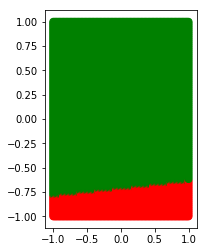

accuracy is 0.5809


In [148]:
w = ridgelinear(X, y, 10e-4)
y_test = np.sum(( X_test[: , 0:2] + .05) ** 2 , 1) < .6
ypred = np.matmul(X_test, w)
acc_vec
acc = 0
y_pred = ypred < .6
z_pred = np.array([ 'r'] * y_pred.shape [0])
z_pred[ y_pred ] = 'g'
ax = plt.subplot(122)
ax.scatter( X_test[: , 0] , X_test[: , 1] ,50 , z_pred , 'o', 'filled')
plt.show()
for i, boolean in enumerate(y_pred):
    if boolean == y_test[i]:
        acc += 1
accuracy = acc / len(y_test)
print('accuracy is', accuracy)

b)

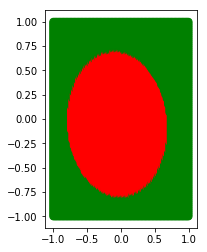

In [149]:
factor = 10e-4
kernel = np.square(np.matmul(X, np.transpose(X)))
alpha = np.matmul(np.linalg.inv(np.add(kernel, factor*np.identity(kernel.shape[0]))), y)

kernel2 = np.square(np.matmul(X, np.transpose(X_test)))
ypred = np.matmul(alpha, kernel2)
y_pred = np.array(ypred) < .6
z_pred = np.array([ 'r'] * y_pred.shape [0])
z_pred[ y_pred ] = 'g'
ax = plt.subplot(122)
ax.scatter( X_test[:,0] , X_test[:,1] ,50 , z_pred , 'o', 'filled')
plt.show()

c) The decision boundary returned by the ridge classifer is linear, while the decision boundary returned by the kernel classifier is nonlinear. Comparing the plot of the results to the sample, the kernel classifier is more accurate than the ridge classifier because of the circular decision boundary.

3. (note: the expression for w in 3c is meant to have an addition sign instead of subtraction)

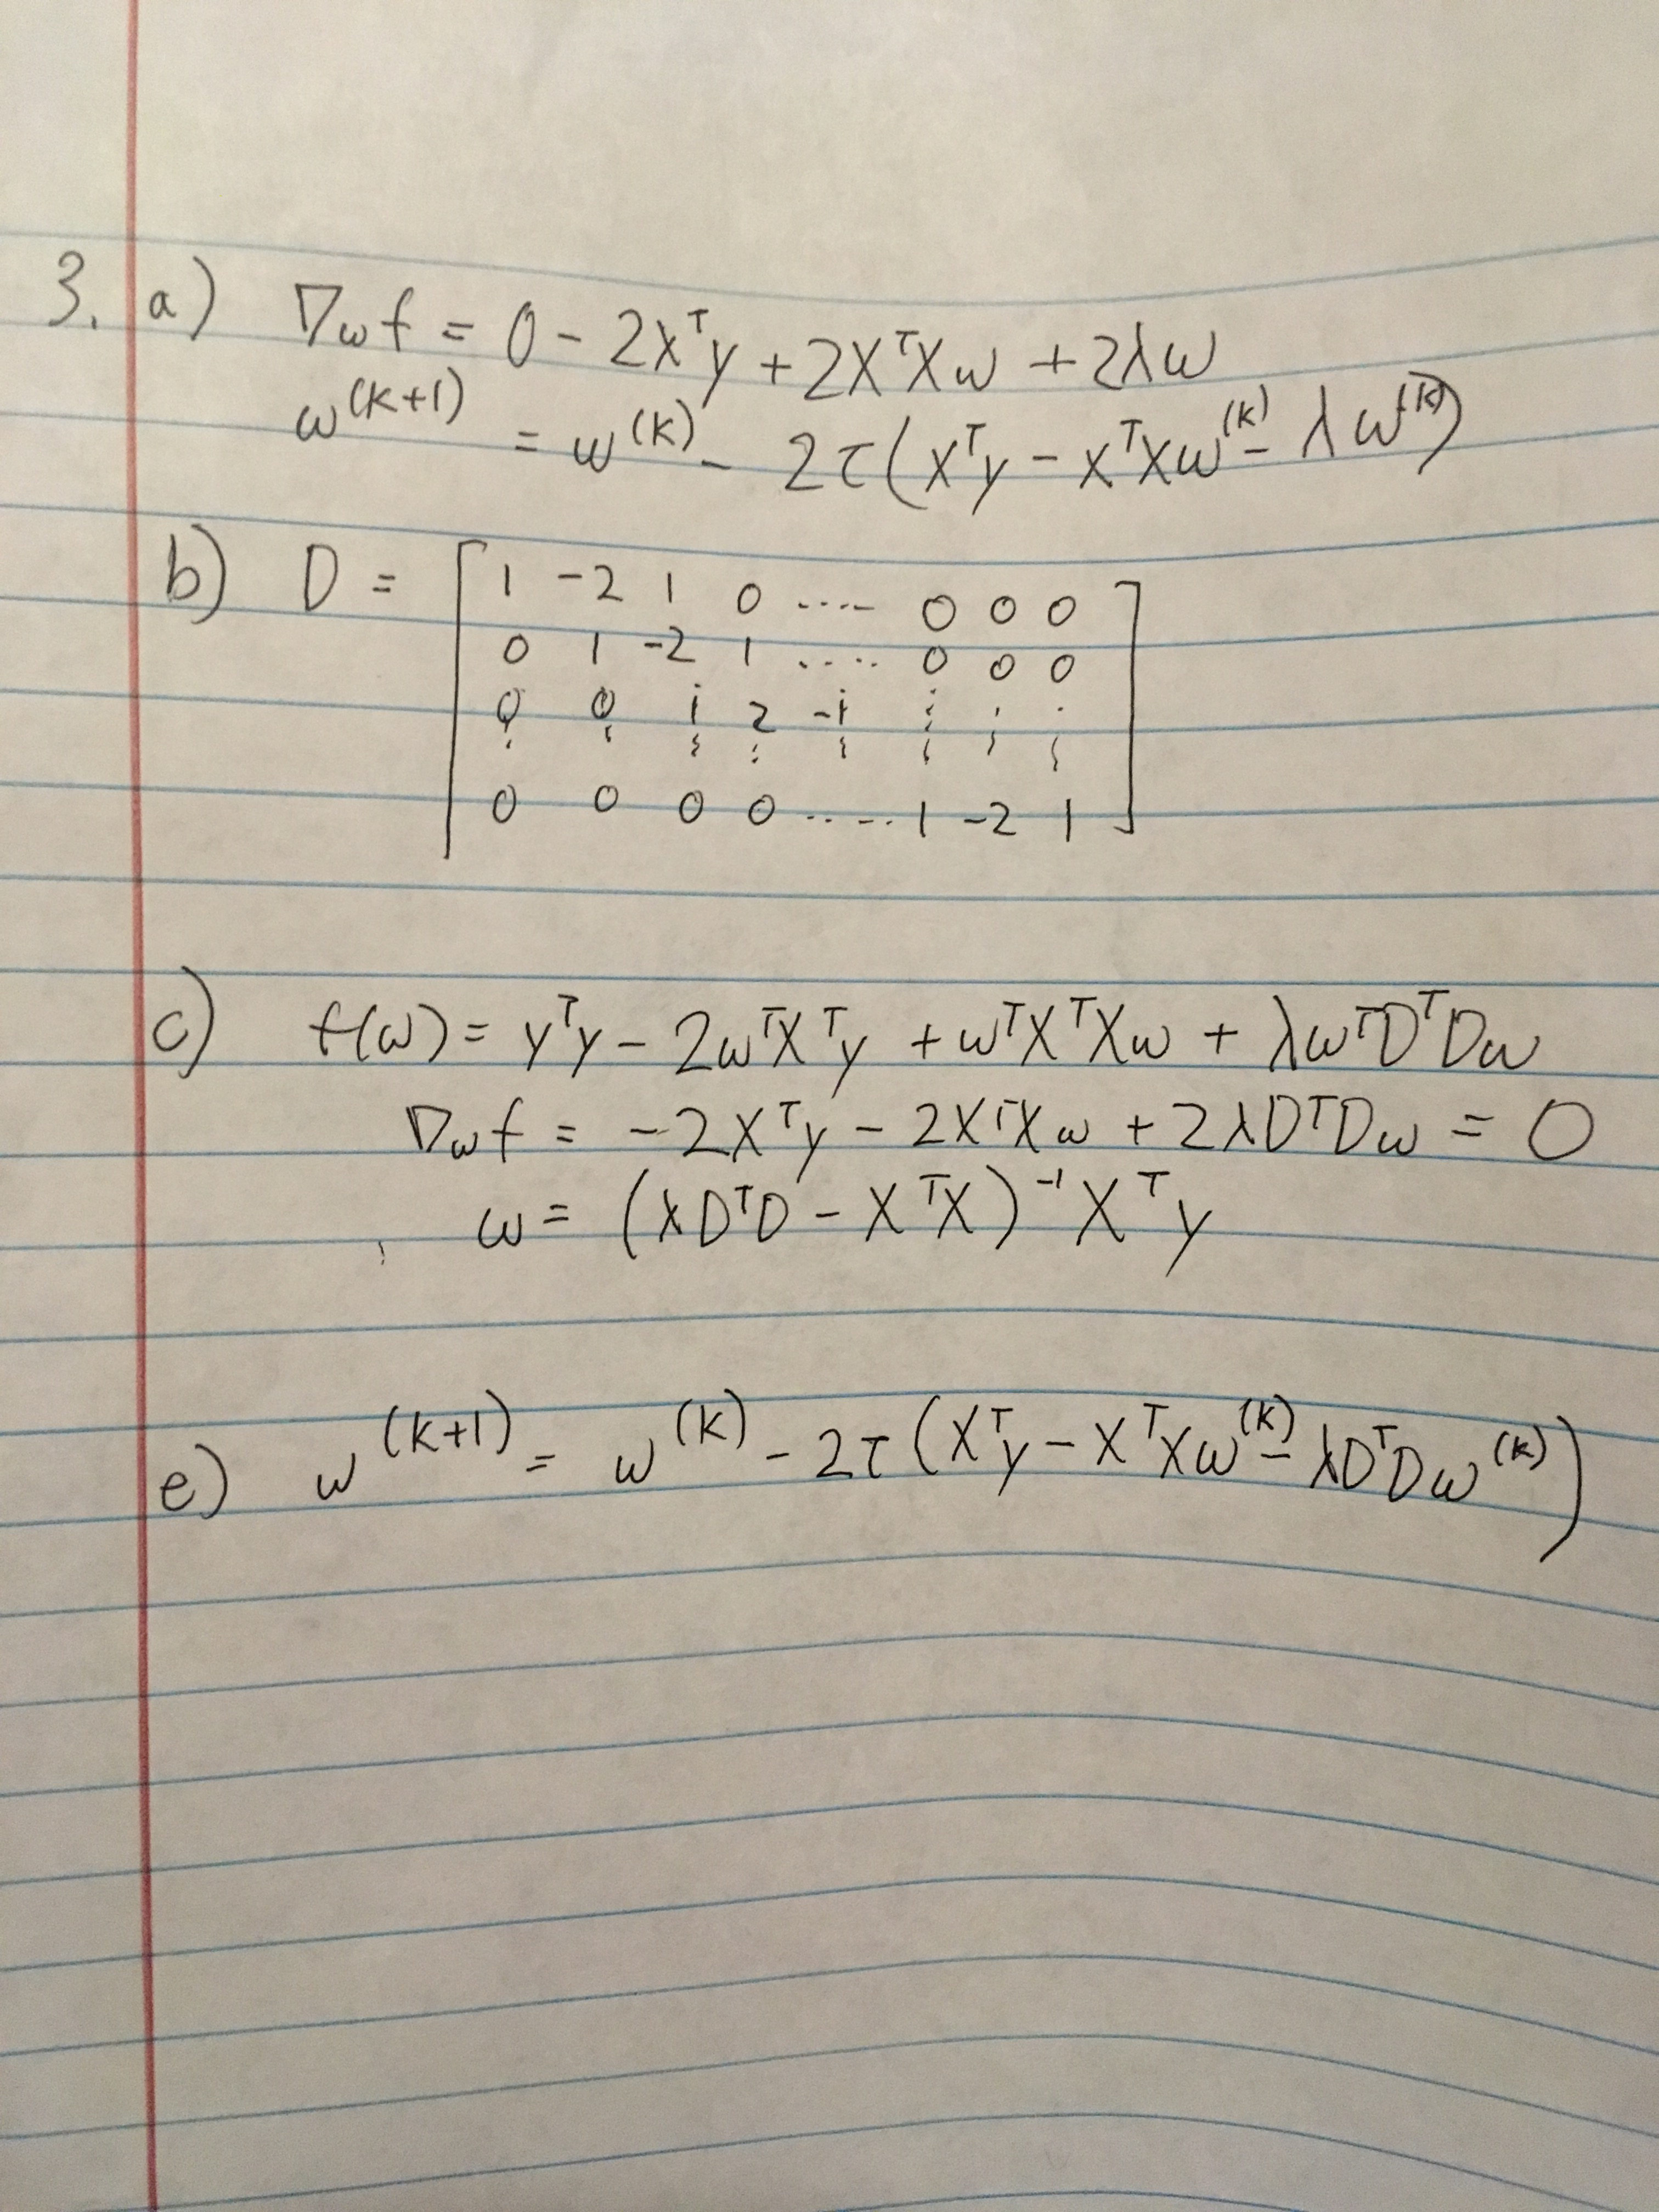

d)
The new tikhinov classifier performs simlarly to the old ridge least squares classifier trained last week. Truncated SVD seems to return more better results, although this is subject to change with our choice of k and lambda.

In [197]:
import  numpy  as np
import  blurring
X = blurring.X
y = blurring.y
# number  of  signal  measurements
n = X.shape[1]
U, S, V = np.linalg.svd(X, full_matrices=False)
# least  squares  estimate  of  signal
w_LS = np.dot(V.T, np.diag(1 / S)).dot(U.T).dot(y)
# SVD  estimates  of  signal
max_k = 50
w_SVD = np.zeros((max_k , n))
# loop  over  different k values  for  truncated
for k in range(max_k):
    w_SVD[k, :] = np.dot(V[0:k, :].T, np.diag(1 / S[0:k])).dot(np.dot(U[:, 0:k].T, y)).T
# regularized  least  squares  estimate
lambdas = [0.5, 1, 2, 4, 8, 16]
w_RLS = np.zeros((len(lambdas), n))
for i, lam in  enumerate(lambdas ):
    w_RLS[i, :] = np.dot(V.T, np.diag(S / (S**2 + lam ))).dot(np.dot(U.T, y)).T

In [249]:
def Dridgelinear(x, y, k):
    D = np.identity(x.shape[1])
    i = -2
    j = -1
    k = 0
    for row in D:
        if i >= 0:
            row[i] = 1
        if j >= 0:
            row[j] = -2
        if k >= 0:
            row[k] = 1
    i += 1
    j += 1
    k += 1
    DTD = np.dot(D.T, D)
    XXT_kX_invert = np.linalg.inv(np.add(np.matmul(np.transpose(x), x), k * DTD))
    w = np.matmul(np.matmul( XXT_kX_invert, np.transpose(x)), y)
    return w

d_RLS = Dridgelinear(blurring.X, blurring.y, 1e-2)

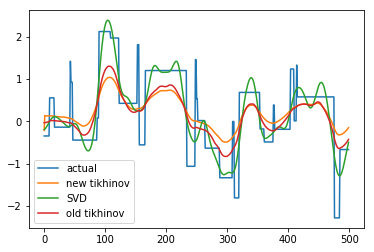

In [250]:
plt.figure()
plt.plot(blurring.w, label='actual')
plt.plot(d_RLS, label = 'new tikhinov')
plt.plot(w_SVD[30, :], label = 'SVD')
plt.plot(w_RLS[0, :], label = 'old tikhinov')
plt.legend()
plt.show()

f)

In [305]:
X = blurring.X
y = blurring.y
D = np.identity(X.shape[1])
i = -2
j = -1
k = 0
for row in D:
    if i >= 0:
        row[i] = 1
    if j >= 0:
        row[j] = -2
    if k >= 0:
        row[k] = 1
    i += 1
    j += 1
    k += 1
DTD = np.dot(D.T, D)

tao = 1e-3
lmbda = 1e-2
epsilon = 1e-2
wk = np.zeros([X.shape[1], 1])
change = 1
i = 0
while change > epsilon:
    gradient = np.subtract(np.subtract(np.dot(X.T, y), np.dot(np.dot(X.T, X), wk)), lmbda*np.dot(DTD, wk))
    wk1 = np.subtract(wk, 2*tao*gradient)
    change = np.linalg.norm(np.subtract(wk1, wk))
    print("change", change)
    #print("wk", wk)
    wk = wk1
    i += 1
    if i > 1000:
        print('overload')
        break
#wasn't able to get gradient descent to converge

change 0.030332482934504277
change 0.030386474724031894
change 0.030440567793666246
change 0.030494762337594433
change 0.030549058550380447
change 0.03060345662696596
change 0.03065795676267101
change 0.030712559153194777
change 0.03076726399461632
change 0.03082207148339529
change 0.030876981816372703
change 0.030931995190771697
change 0.030987111804198247
change 0.03104233185464192
change 0.031097655540476627
change 0.031153083060461415
change 0.031208614613741144
change 0.0312642503998473
change 0.031319990618698744
change 0.03137583547060243
change 0.031431785156254215
change 0.031487839876739594
change 0.03154399983353444
change 0.031600265228505835
change 0.03165663626391276
change 0.03171311314240689
change 0.031769696067033386
change 0.03182638524123164
change 0.031883180868836014
change 0.03194008315407671
change 0.03199709230158042
change 0.0320542085163712
change 0.0321114320038712
change 0.03216876296990144
change 0.03222620162068263
change 0.032283748162835905
change 0.032

change 0.05236384244708283
change 0.05245942366887657
change 0.05255518620029216
change 0.05265113039118884
change 0.05274725659210717
change 0.052843565154271105
change 0.05294005642958844
change 0.053036730770653295
change 0.05313358853074636
change 0.05323063006383664
change 0.053327855724583303
change 0.053425265868336215
change 0.053522860851137714
change 0.05362064102972429
change 0.05371860676152714
change 0.05381675840467411
change 0.053915096317991
change 0.0540136208610029
change 0.05411233239393536
change 0.05421123127771591
change 0.054310317873975625
change 0.0544095925450503
change 0.05450905565398153
change 0.054608707564518834
change 0.05470854864112047
change 0.054808579248954846
change 0.05490879975390237
change 0.05500921052255614
change 0.05510981192222388
change 0.05521060432092934
change 0.055311588087413315
change 0.055412763591135374
change 0.05551413120227537
change 0.055615691291734194
change 0.05571744423113602
change 0.05581939039282939
change 0.055921530149

change 0.09166175944778453
change 0.09183225931628798
change 0.09200308547718429
change 0.09217423856331523
change 0.09234571920875935
change 0.09251752804883447
change 0.09268966572009986
change 0.09286213286035934
change 0.09303493010866307
change 0.09320805810531066
change 0.0933815174918527
change 0.09355530891109393
change 0.09372943300709624
change 0.09390389042517937
change 0.09407868181192477
change 0.09425380781517827
change 0.09442926908405111
change 0.09460506626892418
change 0.09478120002144935
change 0.09495767099455227
change 0.09513447984243488
change 0.09531162722057801
change 0.09548911378574398
change 0.09566694019597846
change 0.09584510711061396
change 0.09602361519027186
change 0.09620246509686438
change 0.09638165749359852
change 0.09656119304497773
change 0.09674107241680356
change 0.0969212962761804
change 0.09710186529151557
change 0.09728278013252395
change 0.09746404147022972
change 0.0976456499769685
change 0.09782760632639036
change 0.09800991119346278
chan

change 0.16471437206561484
change 0.1650252443075714
change 0.16533671574041495
change 0.1656487875311406
change 0.16596146084903476
change 0.166274736865671
change 0.16658861675492073
change 0.166903101692955
change 0.16721819285825068
change 0.16753389143159292
change 0.1678501985960812
change 0.1681671155371335
change 0.16848464344249064
change 0.16880278350222064
change 0.16912153690872453
change 0.1694409048567406
change 0.1697608885433462
change 0.1700814891679671
change 0.1704027079323776
change 0.1707245460407091
change 0.17104700469945094
change 0.17137008511745883
change 0.17169378850595635
change 0.1720181160785405
change 0.17234306905118804
change 0.17266864864225842
change 0.17299485607249798
change 0.17332169256504612
change 0.1736491593454404
change 0.17397725764161973
change 0.1743059886839285
change 0.1746353537051231
change 0.1749653539403784
change 0.1752959906272863
change 0.17562726500586712
change 0.1759591783185708
change 0.1762917318102823
change 0.1766249267283

4.

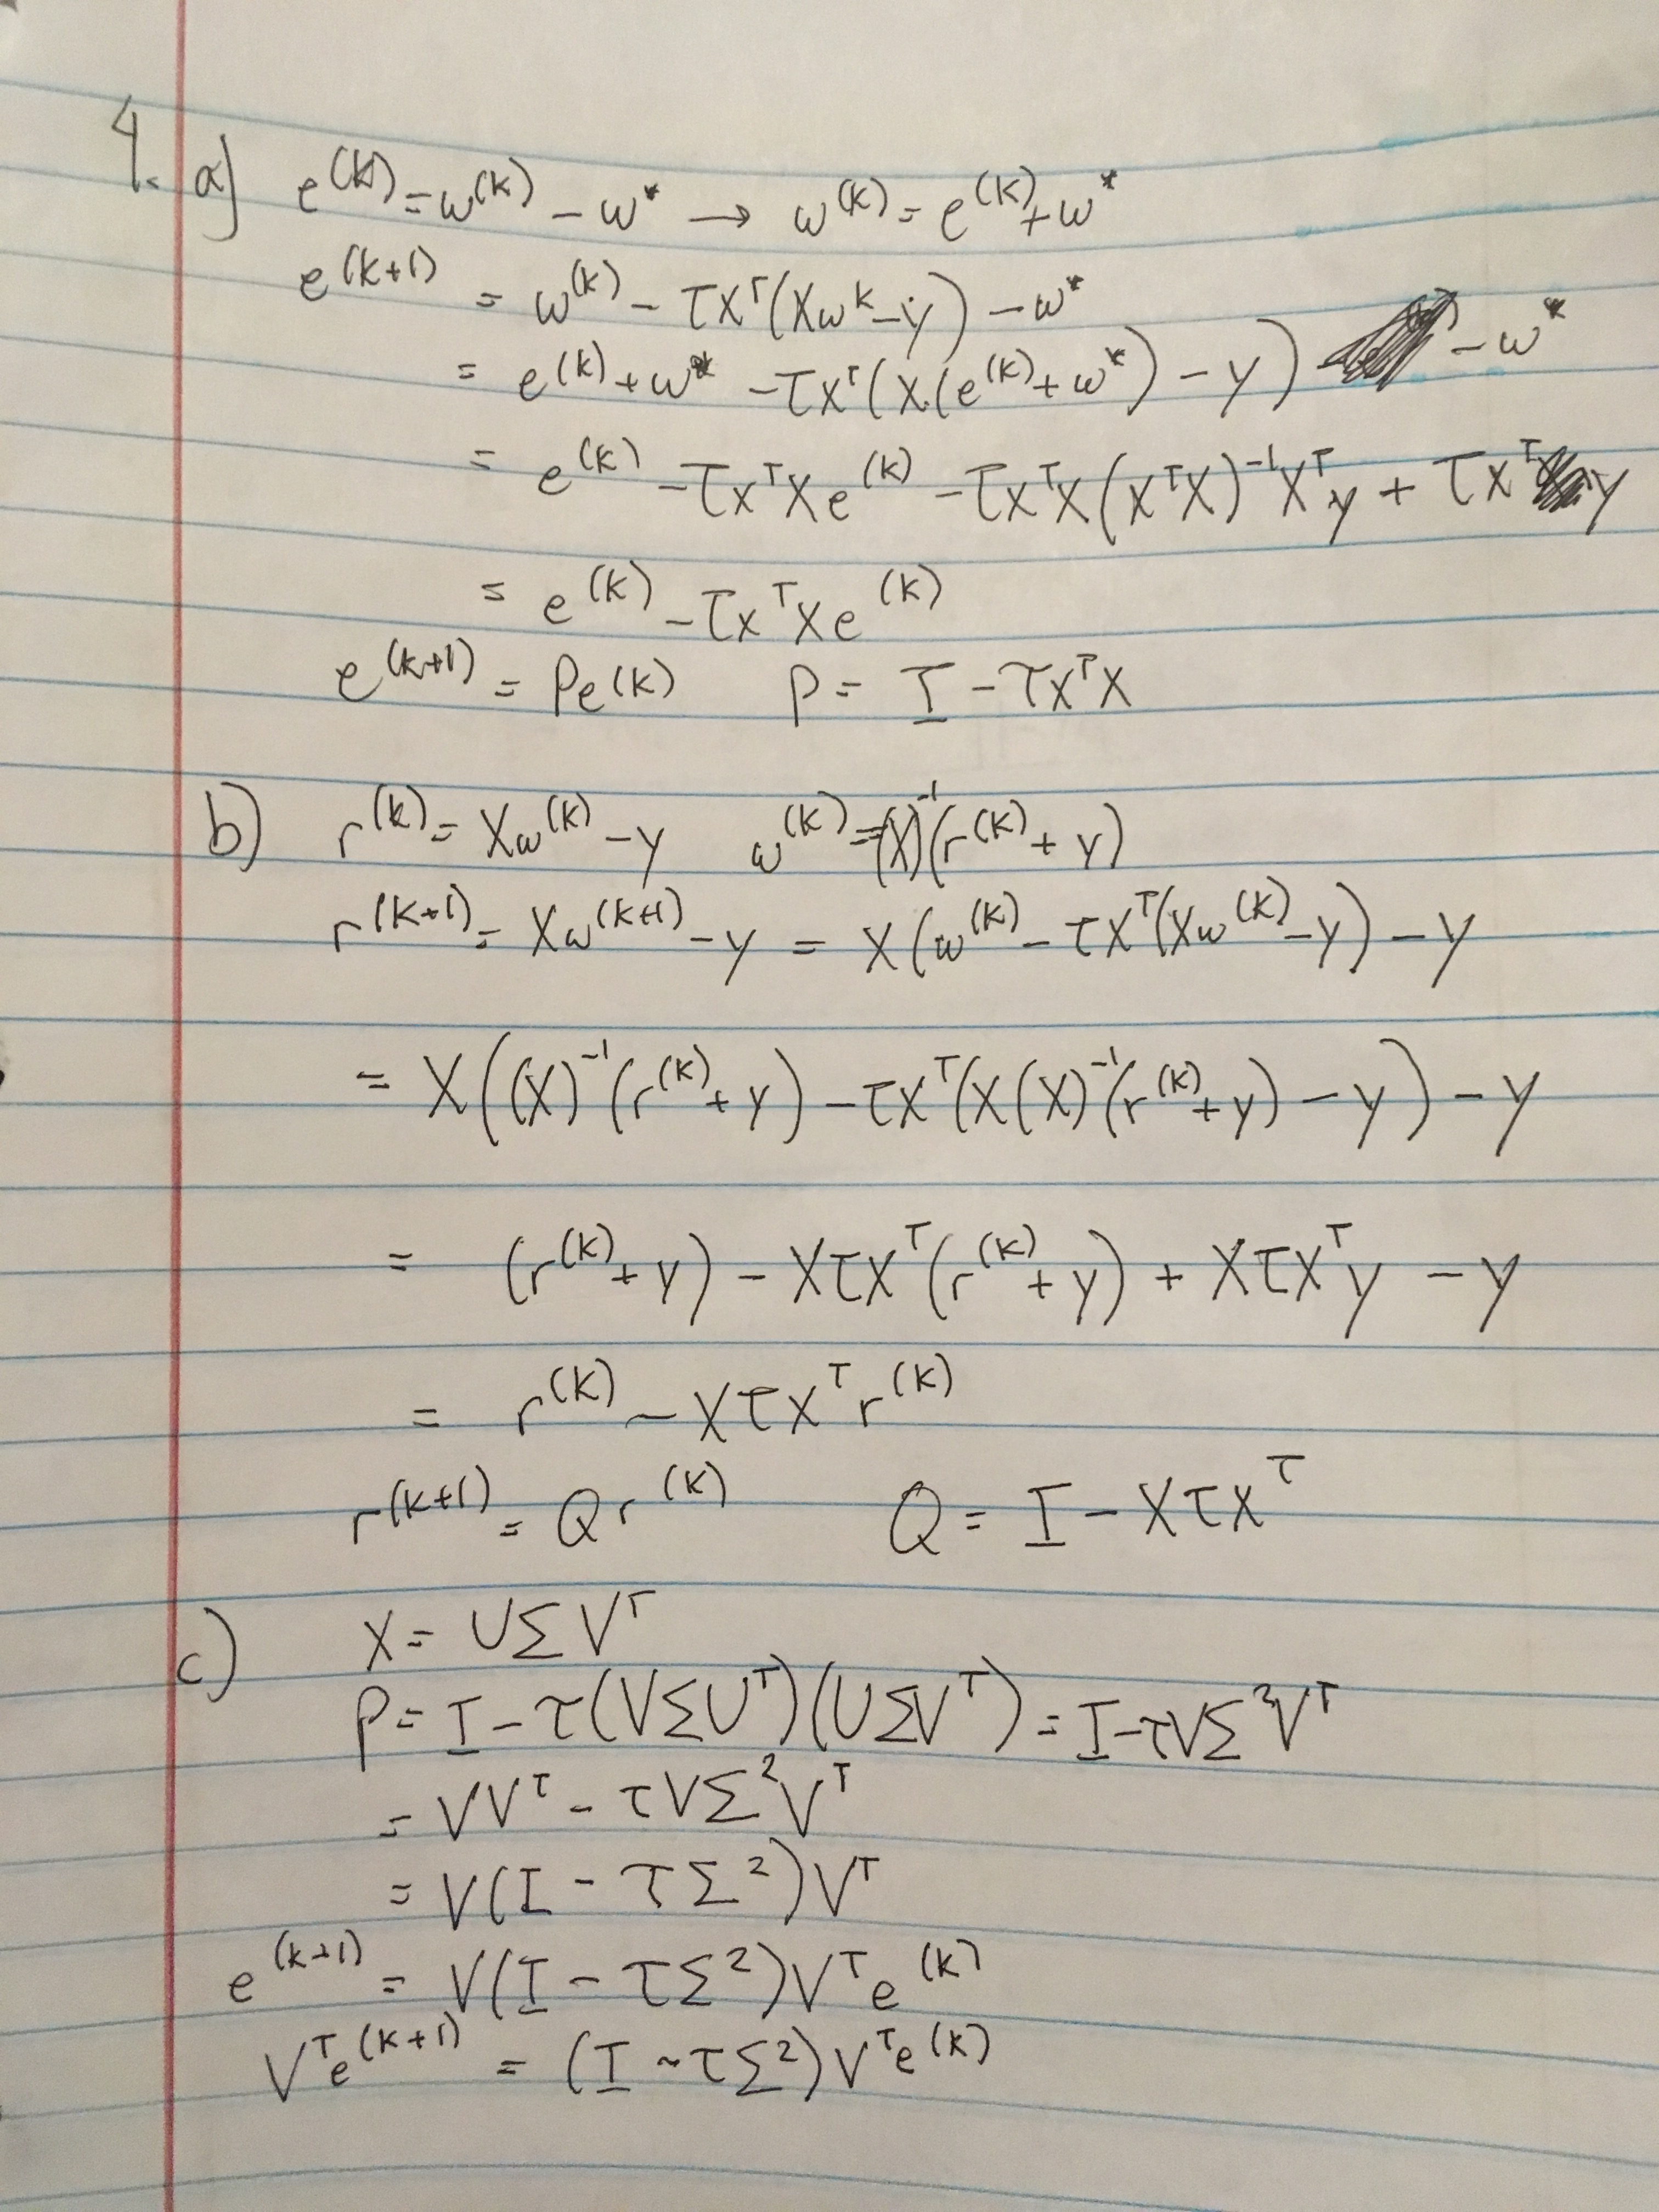

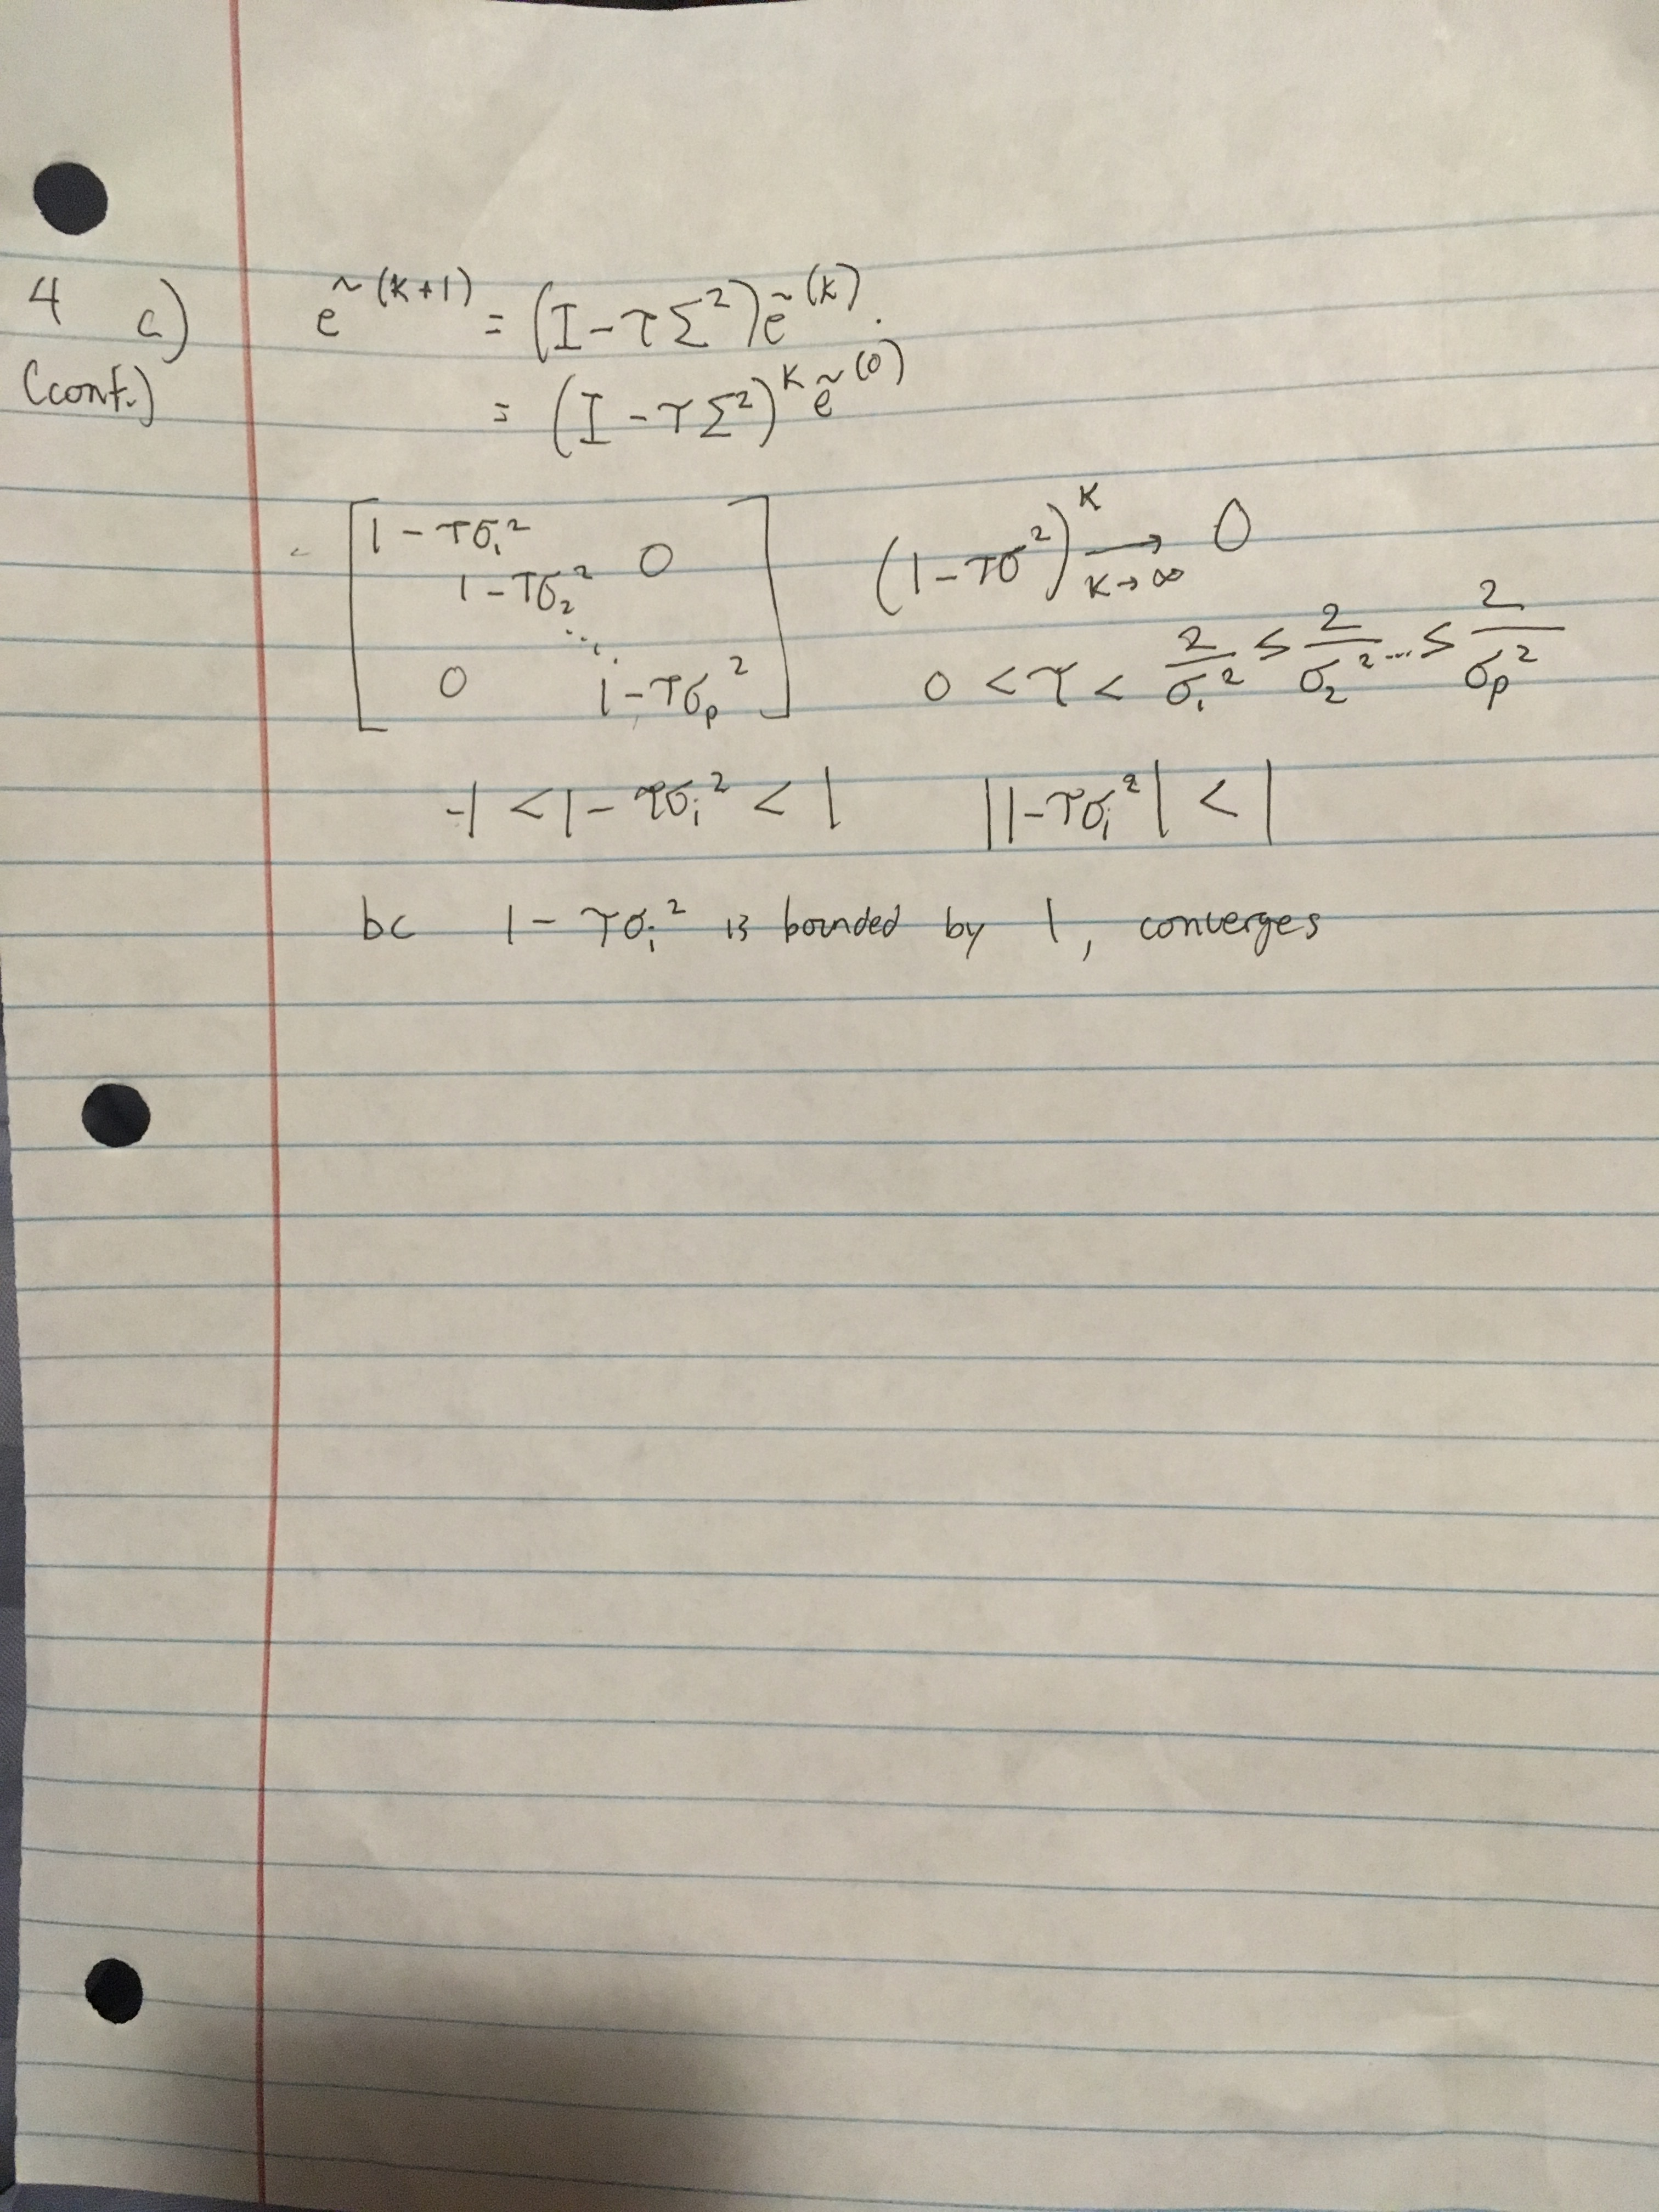